In [1]:
%pwd

'/Users/peiboxu/Desktop/merge-seq analysis/elife_revision/code_file'

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
#import loompy
#print(loompy.__version__)
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [3]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

-----
anndata     0.9.1
scanpy      1.9.3
-----
PIL                 9.5.0
anyio               NA
appnope             0.1.3
arrow               1.2.3
asttokens           NA
attr                23.1.0
babel               2.12.1
backcall            0.2.0
certifi             2023.05.07
cffi                1.15.1
charset_normalizer  3.1.0
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
executing           1.2.0
fastjsonschema      NA
fqdn                NA
h5py                3.9.0
idna                3.4
importlib_resources NA
ipykernel           6.23.3
ipython_genutils    0.2.0
ipywidgets          8.0.6
isoduration         NA
jedi                0.18.2
jinja2              3.1.2
joblib              1.3.0
json5               NA
jsonpointer         2.4
jsonschema          4.17.3
jupyter_events      0.6.3
jupyter_server      2.7.0
jupyterlab_server   2.23.0
kiwis

In [4]:
sc.settings.set_figure_params(dpi=80, frameon=False,fontsize=10,dpi_save=300,format='pdf')  # low dpi (dots per inch) yields small inline figures
plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['pdf.fonttype'] = 'truetype'

In [5]:
adata=sc.read_h5ad('/Users/peiboxu/Desktop/merge-seq analysis/elife_revision/results/pfc.projection.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 1853 × 1868
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'facs', 'percent.mt', 'percent.rp', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'binary'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

In [8]:
top10_degs = pd.read_csv('/Users/peiboxu/Desktop/merge-seq analysis/elife_revision/results/fig5_results/fig5_top10_projection_markers_wobarcodes.csv', dtype=str)

In [11]:
top10_degs['gene']

0      Hs3st4
1       Foxp2
2       Plcb4
3     Ppp1r1b
4        Syt6
       ...   
60     Igfbp6
61    Camk2n2
62      Vegfd
63       Rorb
64      Oprk1
Name: gene, Length: 65, dtype: object

In [31]:
## rename each category of adata.obs['binary] ##
adata.obs['binary']=adata.obs['binary'].astype('category')
adata.obs['binary'].cat.categories=['DMS+AI+MD+LH','DMS+AI+MD', 'DMS+LH','DMS+MD', 'DMS+AI', 'LH', 'BLA','MD','DMS','AI']

/var/folders/x9/gh5rsdsj7dq0tpfg31gj4c6c0000gn/T/ipykernel_19927/2210128867.py:3: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  adata.obs['binary'].cat.categories=['DMS+AI+MD+LH','DMS+AI+MD', 'DMS+LH','DMS+MD', 'DMS+AI', 'LH', 'BLA','MD','DMS','AI']


In [32]:
adata.obs['binary'].cat.categories

Index(['DMS+AI+MD+LH', 'DMS+AI+MD', 'DMS+LH', 'DMS+MD', 'DMS+AI', 'LH', 'BLA',
       'MD', 'DMS', 'AI'],
      dtype='object')

In [11]:
#adata.obs['binary'].cat.reorder_categories(["DMS+MD","DMS+BLA","DMS+LH" ,"MD+LH","DMS+AI","LH","BLA","MD","DMS","AI"], inplace = True)

In [33]:
adata.uns['binary_colors']=["#FAD510","#ED0000FF","#42B540FF","#0099B4FF","#9986A5",
          "#FDAF91FF","#CCBA72","#ADB6B6FF","#5050FFFF",'#ABDDDE']

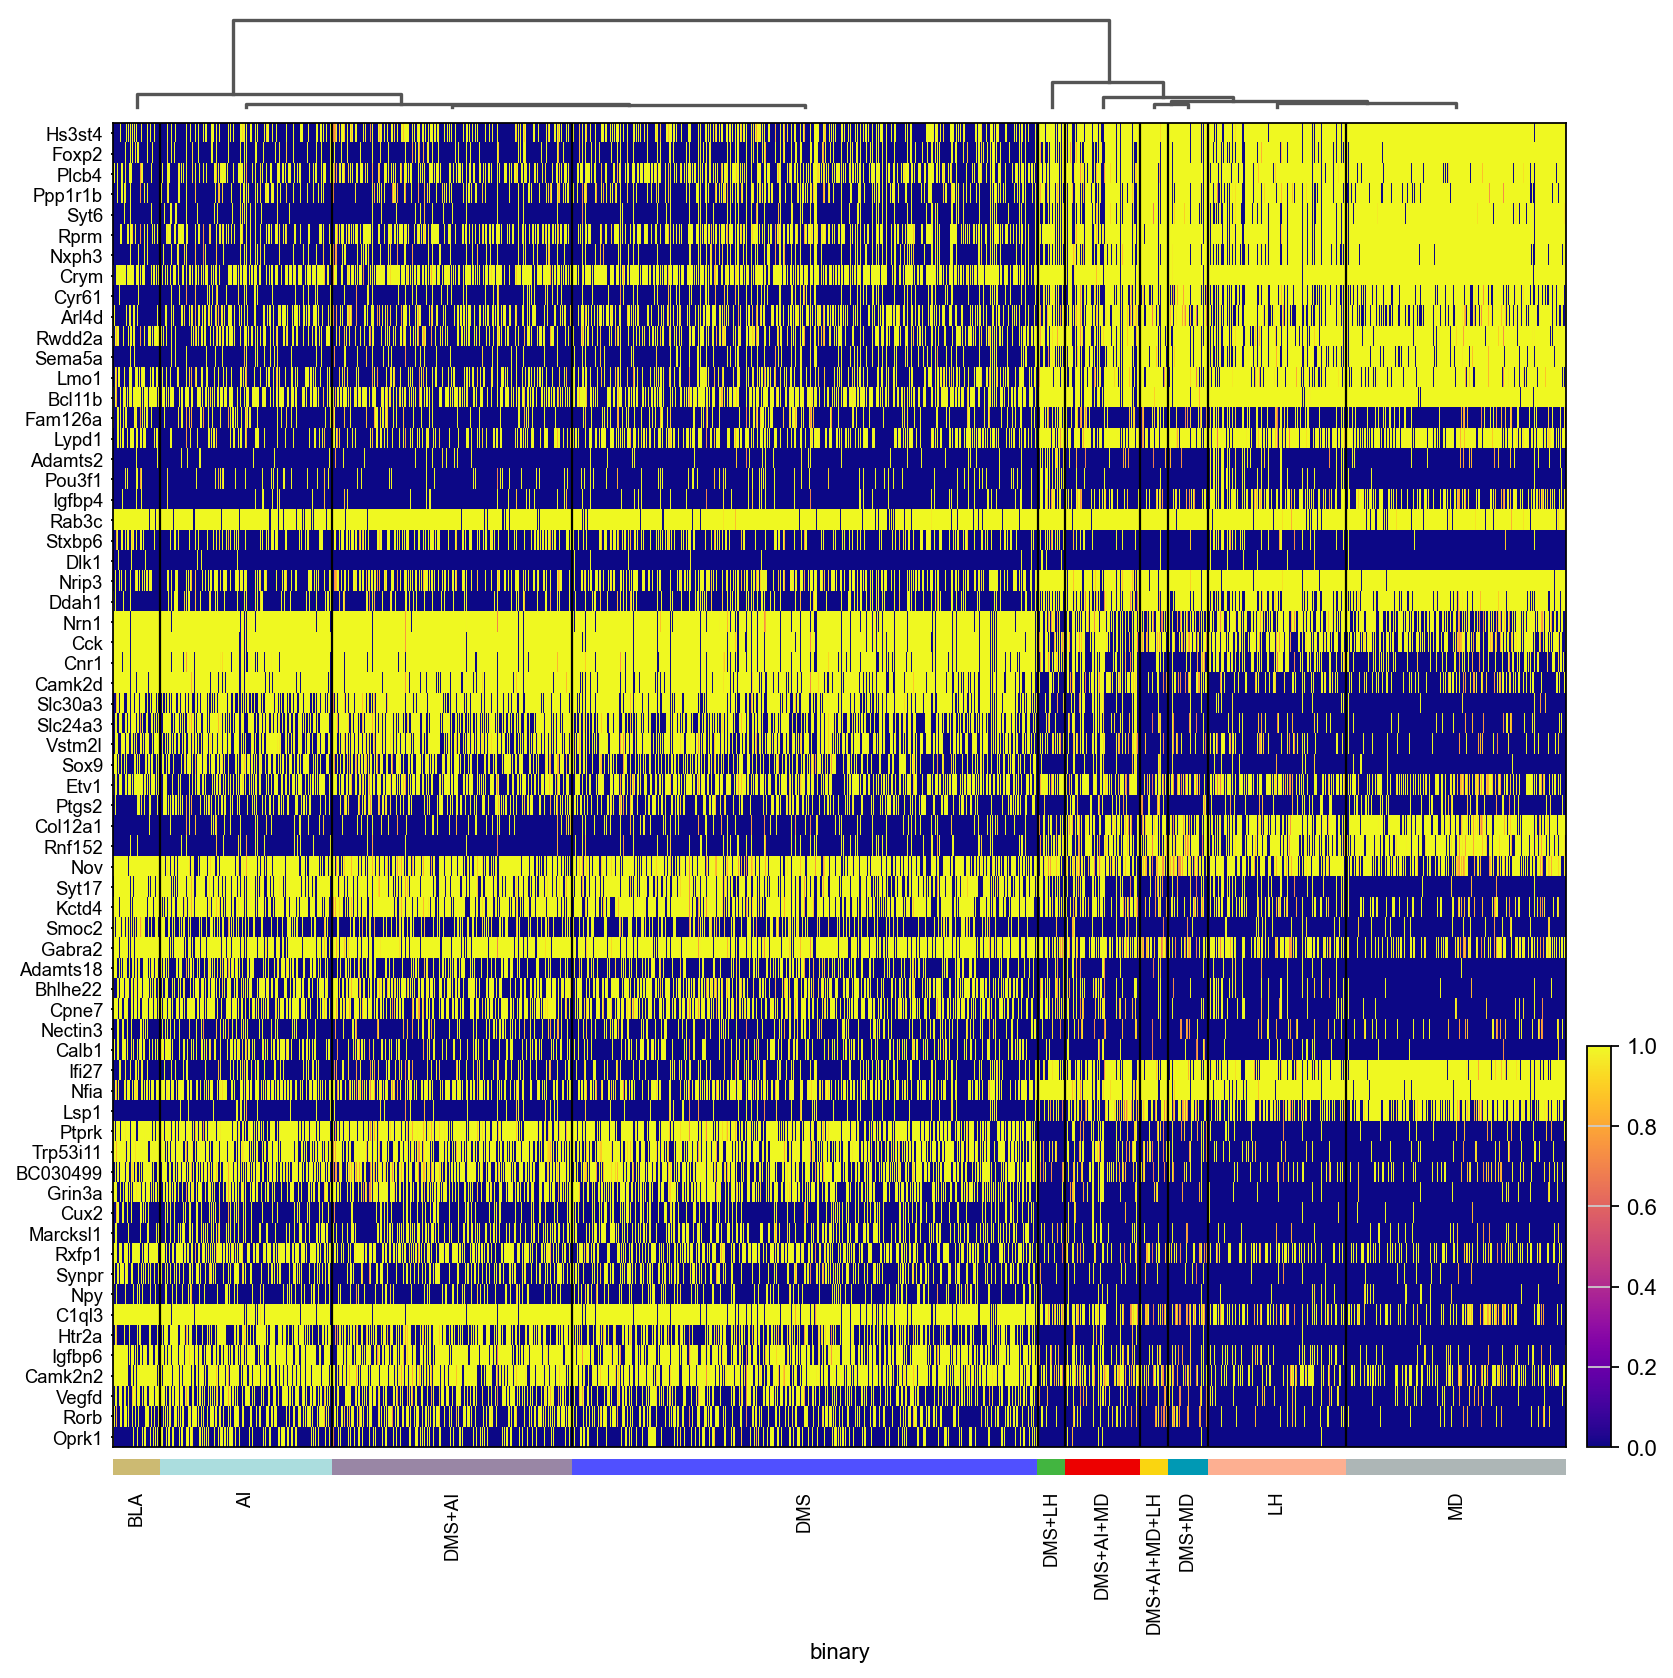

In [16]:
ax = sc.pl.heatmap(adata,top10_degs['gene'],figsize=(12,12),
                   vmin=0, vmax=1,cmap='plasma',dendrogram=True,show_gene_labels=True,swap_axes=True,var_group_rotation=45,#p
                   groupby='binary',
                   #layer='scale_data',
                   save=' fig5_top10 deg same color with pca.pdf'
                  )#

In [23]:
proj_sub_1=adata[adata.obs['binary'].isin(['DMS','LH','DMS+LH'])].copy()

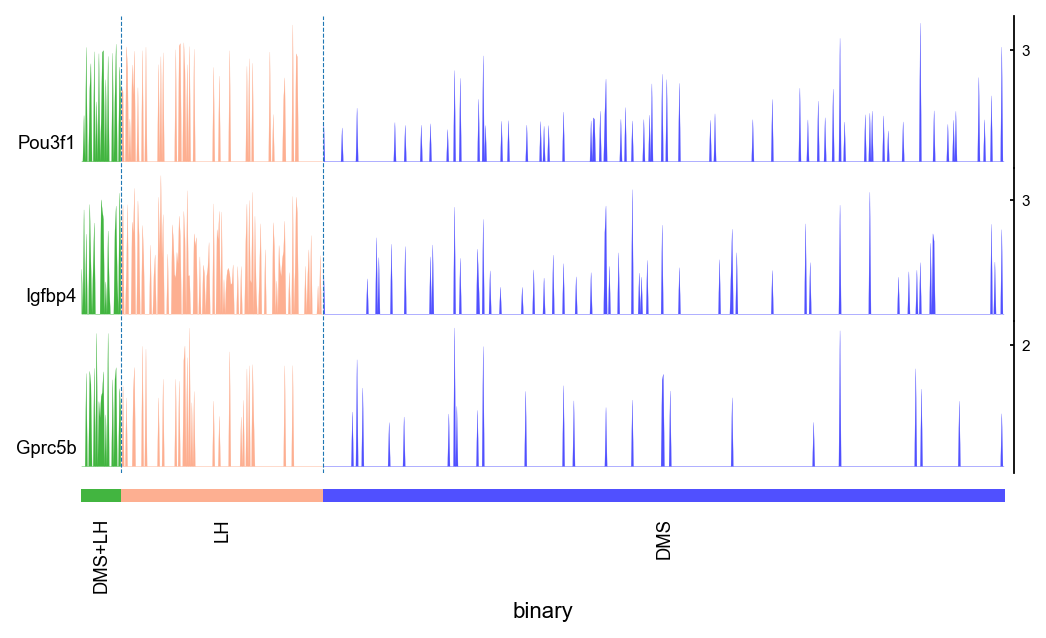

In [24]:
marker_genes=['Pou3f1','Igfbp4','Gprc5b']
    
ax = sc.pl.tracksplot(proj_sub_1,marker_genes,swap_axes=True,
                      figsize=(8,4),
                      groupby='binary',title='Binary Projection',
                      save=' fig5 DMS+LH specific genes.pdf'
                     )

In [34]:
proj_sub_2=adata[adata.obs['binary'].isin(['DMS','MD','DMS+MD'])].copy()

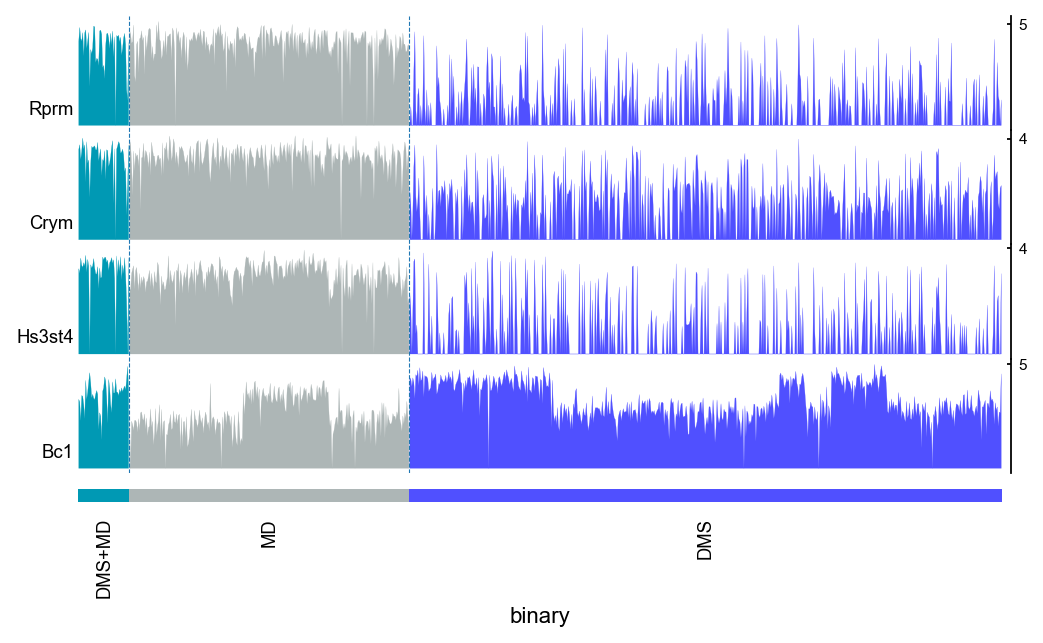

In [38]:
marker_genes=['Rprm','Crym','Hs3st4','Bc1']
    
ax = sc.pl.tracksplot(proj_sub_2,marker_genes,swap_axes=True,
                      figsize=(8,4),
                      groupby='binary',title='Binary Projection',
                      save='DMS+MD specific genes.pdf'
                     )
